In [1]:
import nibabel as nb
import numpy as np
import mne
import matplotlib.pyplot as plt

In [2]:
# Read the image
img = nb.load('/scratch/mcesped/Results/hippunfold/sub-P060/anat/sub-P060_hemi-R_space-cropT1w_desc-subfields_atlas-histologyReference2023_dseg.nii.gz')
#nb.load('/project/ctb-akhanf/cfmm-bids/Khan/SNSX_7T_2021/correct7T.dev/gradcorrect_v0.0.3/sub-P060/anat/sub-P060_acq-MP2RAGEpostproc_run-01_T1w.nii.gz')

In [83]:
type(img)

nibabel.nifti1.Nifti1Image

In [3]:
data = img.get_fdata()

In [4]:
data.shape

(256, 256, 256)

In [4]:
# Test 1 coordinate
coord = [30.462402292, 12.172049632400006, -40.1737889638]

In [7]:
# To voxels
inv_affine = np.linalg.inv(img.affine)
vox = np.round((mne.transforms.apply_trans(inv_affine, coord))).astype(int)
vox

array([174, 161, 111])

In [7]:
mask = np.zeros(data.shape)

In [8]:
mask[vox[0], vox[1], vox[2]] = 1

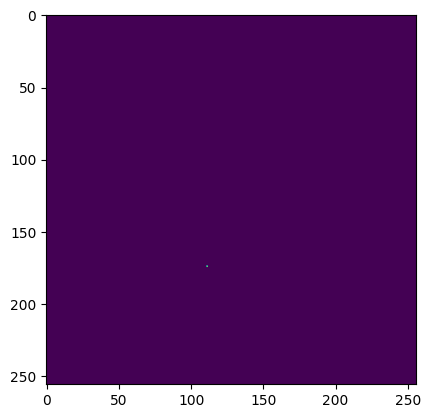

In [9]:
plt.imshow(mask[:, vox[1], :])

In [10]:
from skimage.morphology import dilation
from skimage.morphology import ball

footprint = ball(1)
dilated = dilation(mask, footprint)

In [91]:
dilated = mask.copy()
idx_in = int(np.floor(len(footprint)/2))
idx_end = int(np.ceil(len(footprint)/2))
dilated[vox[0]-idx_in:vox[0]+idx_end, vox[1]-idx_in:vox[1]+idx_end, vox[2]-idx_in:vox[2]+idx_end] = footprint

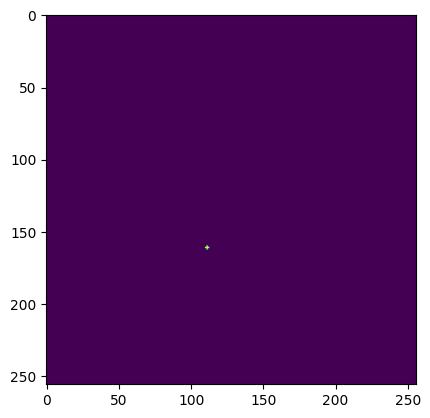

In [ ]:
plt.imshow(dilated[vox[0],:,:])

In [93]:
clipped_img = nb.Nifti1Image(dilated, img.affine, img.header)

In [94]:
nb.save(clipped_img, 'test.nii.gz')

In [96]:
img.header['pixdim']

array([1.        , 0.19687499, 0.19840176, 0.19568151, 0.        ,
       0.        , 0.        , 0.        ], dtype=float32)

# Test 2 points

In [8]:
point_A = [28.469, 12.165, -40.180]
point_B = [32.456, 12.179, -40.168]

In [9]:
# Convert to voxels
point_A = np.round((mne.transforms.apply_trans(inv_affine, point_A))).astype(int)
point_B = np.round((mne.transforms.apply_trans(inv_affine, point_B))).astype(int)

In [10]:
print(point_A, point_B)

[164 161 111] [184 161 111]


In [57]:
# https://www.geeksforgeeks.org/bresenhams-algorithm-for-3-d-line-drawing/
def create_line_mask(point1, point2, shape):
    # Create an empty mask with the specified shape
    mask = np.zeros(shape, dtype=bool)
    x1, y1, z1 = point1
    x2, y2, z2 = point2
    # Set the first element to true
    mask[x1, y1, z1] = True
    # Get the directions of each axis
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    dz = abs(z2 - z1)
    if (x2 > x1):
        xs = 1
    else:
        xs = -1
    if (y2 > y1):
        ys = 1
    else:
        ys = -1
    if (z2 > z1):
        zs = 1
    else:
        zs = -1
 
    # Driving axis is X-axis
    if (dx >= dy and dx >= dz):       
        p1 = 2 * dy - dx
        p2 = 2 * dz - dx
        while (x1 != x2):
            x1 += xs
            if (p1 >= 0):
                y1 += ys
                p1 -= 2 * dx
            if (p2 >= 0):
                z1 += zs
                p2 -= 2 * dx
            p1 += 2 * dy
            p2 += 2 * dz
            mask[x1, y1, z1] = True
        mask[x1, y1, z1] = True
 
    # Driving axis is Y-axis"
    elif (dy >= dx and dy >= dz):      
        p1 = 2 * dx - dy
        p2 = 2 * dz - dy
        while (y1 != y2):
            y1 += ys
            if (p1 >= 0):
                x1 += xs
                p1 -= 2 * dy
            if (p2 >= 0):
                z1 += zs
                p2 -= 2 * dy
            p1 += 2 * dx
            p2 += 2 * dz
            mask[x1, y1, z1] = True
        mask[x1, y1, z1] = True
 
    # Driving axis is Z-axis"
    else:       
        p1 = 2 * dy - dz
        p2 = 2 * dx - dz
        while (z1 != z2):
            z1 += zs
            if (p1 >= 0):
                y1 += ys
                p1 -= 2 * dz
            if (p2 >= 0):
                x1 += xs
                p2 -= 2 * dz
            p1 += 2 * dy
            p2 += 2 * dx
            mask[x1, y1, z1] = True
        mask[x1, y1, z1] = True
    return mask

In [67]:
a = np.random.rand(10,3)
a[0,:].tolist()

[0.4171373625157686, 0.27107585540986356, 0.8629806518793617]

In [58]:
test_mask = create_line_mask(point_A, point_B, data.shape)

In [50]:
[array.tolist() for array in np.where(test_mask)]

[[165,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  182,
  183,
  184],
 [161,
  161,
  161,
  161,
  161,
  161,
  161,
  161,
  161,
  161,
  161,
  161,
  161,
  161,
  161,
  161,
  161,
  161,
  161,
  161],
 [111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111]]

In [59]:
from skimage.morphology import dilation
from skimage.morphology import ball

footprint = ball(1)
dilated = dilation(test_mask, footprint)

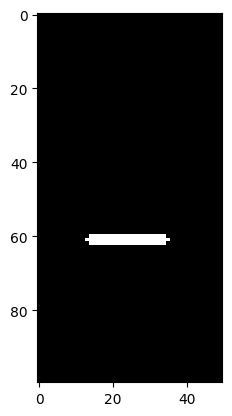

In [60]:
plt.imshow(dilated[150:200,vox[1],50:150].transpose(), cmap='gray') # Adjusted the view to look like slicer

In [61]:
clipped_img = nb.Nifti1Image(dilated, img.affine, img.header)
nb.save(clipped_img, 'test2.nii.gz')

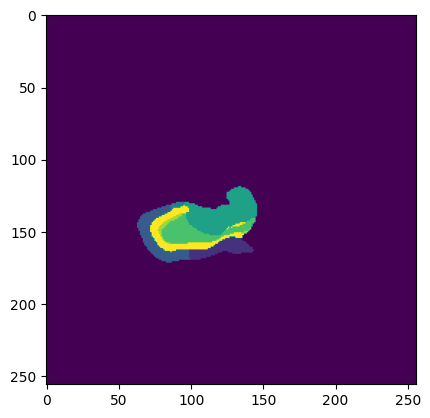

In [24]:
# Show labels
plt.imshow(data[::-1,vox[1],::-1].transpose())

(256, 256, 256)


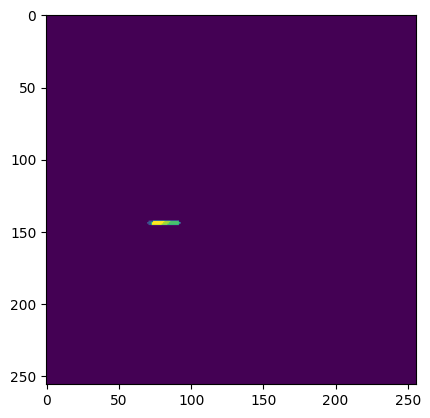

In [62]:
masked_labels = data * dilated
print(masked_labels.shape)
plt.imshow(masked_labels[::-1,vox[1],::-1].transpose())

In [63]:
masked_img = nb.Nifti1Image(masked_labels, img.affine, img.header)
nb.save(masked_img, 'masked.nii.gz')

In [50]:
len(masked_labels[dilated])

67

In [73]:
data[dilated]

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       6., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 7., 6., 6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 2., 7., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.])

In [82]:
freq_labels = []
regions_chn = data[dilated]
for label in np.unique(regions_chn):
    freq_labels.append((label, np.round(len(regions_chn[regions_chn==label])/len(regions_chn), 2)))
    
freq_labels

[(2.0, 0.11), (5.0, 0.35), (6.0, 0.19), (7.0, 0.36)]

In [84]:
sorted(freq_labels, key=lambda x: x[1], reverse=True)[0][0]

7.0

In [40]:
data.shape

(256, 256, 256)

# Test functions